In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import io
import re
from random import randint
import time
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
headers = { "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
            "Accept-Encoding": "gzip, deflate, br", 
            "Accept-Language" : "pl-PL,pl;q=0.9,en-US;q=0.8,en;q=0.7",
            "Upgrade-Insecure-Requests": "1", 
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"}

In [224]:
#prepare the file
dataFile = io.open('mieszkania_krakow.txt','w',encoding='utf-8')

for i in range (0, 600, 30):
    currentPage = 'https://sprzedajemy.pl/krakow/nieruchomosci/mieszkania?inp_text%5Bv%5D=strony+z+mieszkaniami&inp_text%5Bn%5D=1&sort=inp_srt_score_dscore_d&offset=' + str(i)
    r = requests.get(currentPage)
    soup = BeautifulSoup(r.text, 'lxml')
    flats = soup.find('ul', class_ = 'list normal').find_all('li', id = re.compile("^offer"))
    for flat in flats:
            #website
            website = f"https://sprzedajemy.pl{flat.find('a', href=True)['href']}"
            print(website)
            try: 
                dataFile.write(website + ',')
            except:
                dataFile.write('n/a,')
            
            #city
            try:
                city_with_tabs = flat.find('a', class_ = 'location').find('strong', class_ = 'city').text
                city = re.sub(r"[\n\t\s]*", "", city_with_tabs)
                dataFile.write(city + ',')
            except:
                dataFile.write('n/a,')
                
            #district
            try:
                district = flat.find('a', class_ = 'location').span.text
                dataFile.write(district+',')
            except:
                dataFile.write('n/a,')
                
            #description
            try:
                description_with_tabs = flat.h2.text
                description = re.sub(r"[\n\t]*", "", description_with_tabs).strip().replace(',','.')
                dataFile.write(description + ',')
            except:
                dataFile.write('n/a,')

            #price
            try:
                price_with_tabs = flat.find('span', class_ = 'price').text
                price = re.sub(r"[\n\t\s]*", "", price_with_tabs).replace(',','.')
                dataFile.write(price + '')
            except:
                dataFile.write('n/a')
             
            r = requests.get(website)
            soup = BeautifulSoup(r.text, 'lxml')
            attribute_list = soup.find('ul', class_ = 'attribute-list')
            strongs = attribute_list.find_all('strong')
            att = ''
            for s in strongs:
                att += ','                
                att += s.text.replace(',','.') 
            print(att)
            dataFile.write(att)               
            dataFile.write('\n')
            
            #random_int = randint(2,5)
            #print(f'SLEEPING for {random_int} sec!')
            #time.sleep(random_int)
            
    print(f"Parsed {i+30} offers")
dataFile.close()

https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-40-6-metrow-2-pokojowe-2-1b8e55-nr65130412
,firmy ,pierwotny ,11600 zł/m²,40.6 m²,-,2 ,inne ,-,-,2023 ,własność ,4 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-raclawicka-okolice-37-56-metrow-2-pokoje-2-1b8e55-nr65130281
,firmy ,pierwotny ,15199 zł/m²,37.56 m²,blok ,2 ,inne ,-,-,2022 ,własność ,2 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-54-79m2-3-pokoje-2-1b8e55-nr65130473
,firmy ,pierwotny ,10350 zł/m²,54.79 m²,-,3 ,inne ,-,-,2023 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/oferta-sprzedazy-mieszkania-krakow-saska-okolice-67-99m2-3-pokojowe-2-1b8e55-nr64164969
,firmy ,pierwotny ,10900 zł/m²,67.99 m²,blok ,3 ,inne ,-,-,2021 ,własność ,3 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-66-89m2-4-pokojowe-krakow-okolice-ul-wyki-2-1b8e55-nr65130453
,firmy ,pierwotny ,10650 zł/m²,66.89 m²,-,4 ,inne ,-,-,2023 ,własność ,4 ,-
SLEEPING for 2 sec!
https://sp

,firmy ,pierwotny ,11800 zł/m²,38.8 m²,-,2 ,inne ,-,-,2023 ,własność ,4 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-40-6m2-2-pokoje-2-1b8e55-nr65130414
,firmy ,pierwotny ,11600 zł/m²,40.6 m²,-,2 ,inne ,-,-,2023 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/sprzedaz-mieszkania-krakow-okolice-ul-wyki-41-57m2-2-pokojowe-2-1b8e55-nr65130409
,firmy ,pierwotny ,11600 zł/m²,41.57 m²,-,2 ,inne ,-,-,2023 ,własność ,3 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-38-76m2-2-pokojowe-krakow-2-1b8e55-nr65130359
,firmy ,pierwotny ,11800 zł/m²,38.76 m²,-,2 ,inne ,-,-,2023 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/oferta-sprzedazy-mieszkania-krakow-okolice-ul-wyki-28-9m2-1-pokoj-2-1b8e55-nr65130435
,firmy ,pierwotny ,12900 zł/m²,28.9 m²,-,1 ,inne ,-,-,2023 ,własność ,-,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-52-41m2-2-pokoje-2-1b8e55-nr65130399
,firmy ,pierwotny ,10800 zł/m²,52.41 m²,-,2 ,inne ,-,-,2023

,firmy ,pierwotny ,15100 zł/m²,35.6 m²,blok ,2 ,inne ,-,-,2022 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/oferta-sprzedazy-mieszkania-krakow-okolice-ul-wyki-52-36m2-3-pokojowe-2-1b8e55-nr65130311
,firmy ,pierwotny ,10800 zł/m²,52.36 m²,-,3 ,inne ,-,-,2023 ,własność ,7 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/oferta-sprzedazy-mieszkania-48-49-metrow-3-pokojowe-krakow-2-1b8e55-nr65130336
,firmy ,pierwotny ,10800 zł/m²,48.49 m²,-,3 ,inne ,-,-,2023 ,własność ,-,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/ogloszenie-mieszkanie-37-54m2-2-pokojowe-krakow-2-1b8e55-nr65130302
,firmy ,pierwotny ,14800 zł/m²,37.54 m²,blok ,2 ,inne ,-,-,2022 ,własność ,-,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-48-54m2-3-pokojowe-2-1b8e55-nr65130335
,firmy ,pierwotny ,10800 zł/m²,48.54 m²,-,3 ,inne ,-,-,2023 ,własność ,1 ,-
SLEEPING for 1 sec!
parsed 90 offers
SLEEPING for 4 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-48-54m2-3-pokojowe-

https://sprzedajemy.pl/mieszkanie-krakow-kazimierz-42-59m2-1-pokojowe-2-1b8e55-nr65682703
,firmy ,wtórny ,11912 zł/m²,42.59 m²,kamienica ,1 ,cegła ,-,-,1908 ,własność ,4 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/sprzedam-mieszkanie-60-33m2-2-pokoje-krakow-raclawicka-okolice-2-1b8e55-nr65130300
,firmy ,pierwotny ,14600 zł/m²,60.33 m²,blok ,2 ,inne ,-,-,2022 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-38-76-metrow-2-pokoje-2-1b8e55-nr65130360
,firmy ,pierwotny ,11800 zł/m²,38.76 m²,-,2 ,inne ,-,-,2023 ,własność ,6 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-54-73m2-3-pokojowe-krakow-2-1b8e55-nr65130439
,firmy ,pierwotny ,10350 zł/m²,54.73 m²,-,3 ,inne ,-,-,2023 ,własność ,-,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-37-91m2-2-pokojowe-2-1b8e55-nr65130371
,firmy ,pierwotny ,11800 zł/m²,37.91 m²,-,2 ,inne ,-,-,2023 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krako

,firmy ,wtórny ,12354 zł/m²,41.2 m²,blok ,2 ,cegła ,-,-,2007 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-51m2-2-pokoje-2-1b8e55-nr65848371
,firmy ,wtórny ,9313 zł/m²,51 m²,blok ,2 ,cegła ,-,-,1955 ,własność ,-,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-os-zgody-37m2-2-1b8e55-nr65848402
,firmy ,wtórny ,11486 zł/m²,37 m²,blok ,2 ,cegła ,-,-,1955 ,własność ,1 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-sprzedam-50-34-metry-2-pokoje-krakow-2-1b8e55-nr65848374
,firmy ,wtórny ,9912 zł/m²,50.34 m²,blok ,2 ,-,-,-,1980 ,własność ,3 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/ruczaj-2-pokoje-miejsce-postojowe-platnosc-10-90-krakow-2-1b8e55-nr65991627
,firmy ,pierwotny ,12731 zł/m²,35.85 m²,blok ,2 ,-,-,sieć ,2022 ,-,3 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-56-1m2-3-pokojowe-2-1b8e55-nr65925088
,firmy ,wtórny ,9358 zł/m²,56.1 m²,blok ,3 ,wielka płyta ,-,-,1980 ,własność ,-,-
SLEEPING for 2 sec!
https://sp

,firmy ,wtórny ,14046 zł/m²,64 m²,kamienica ,3 ,cegła ,-,-,1911 ,udział ,2 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-50-4m2-2-pokoje-2-1b8e55-nr65988794
,firmy ,wtórny ,13273 zł/m²,50.4 m²,apartamentowiec ,2 ,cegła ,-,-,2016 ,własność ,3 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-38-87m2-2-pokojowe-krakow-2-1b8e55-nr65302337
,firmy ,wtórny ,10136 zł/m²,38.87 m²,blok ,2 ,inne ,-,-,2021 ,-,2 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-65-9m2-4-pokoje-krakow-meissnera-2-1b8e55-nr65989433
,firmy ,wtórny ,9787 zł/m²,65.9 m²,blok ,4 ,-,-,-,-,-,8 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-54-38m2-3-pokoje-krakow-2-1b8e55-nr65679173
,firmy ,wtórny ,10279 zł/m²,54.38 m²,blok ,3 ,-,-,-,1980 ,własność ,3 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/ogloszenie-mieszkanie-41m2-3-pokojowe-krakow-2-1b8e55-nr64908488
,firmy ,pierwotny ,14069 zł/m²,41 m²,apartamentowiec ,3 ,-,-,-,2021 ,własność ,1 ,-
SLEEPING for 2 sec!
https://sprzedajemy

,firmy ,pierwotny ,10700 zł/m²,50.72 m²,-,2 ,inne ,-,-,2023 ,własność ,5 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-38-52m2-2-pokojowe-krakow-2-1b8e55-nr65922455
,firmy ,wtórny ,12201 zł/m²,38.52 m²,blok ,2 ,inne ,-,-,1974 ,własność ,2 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-43-56m2-2-pokojowe-2-1b8e55-nr65986732
,firmy ,pierwotny ,11100 zł/m²,43.56 m²,-,2 ,inne ,-,-,2023 ,własność ,1 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-49-23m2-2-pok-2-1b8e55-nr65986712
,firmy ,pierwotny ,10700 zł/m²,49.23 m²,-,2 ,inne ,-,-,2023 ,własność ,2 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-28-92m-krakow-2-1b8e55-nr64297189
,firmy ,pierwotny ,13675 zł/m²,28.92 m²,blok ,1 ,-,-,-,2019 ,własność ,3 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-49-14m2-2-pokojowe-krakow-2-1b8e55-nr65986716
,firmy ,pierwotny ,10400 zł/m²,49.14 m²,-,2 ,inne ,-,-,2023 ,własność ,-,-
SLEEPING for 2 sec!
https://s

,firmy ,pierwotny ,11100 zł/m²,44.47 m²,-,2 ,inne ,-,-,2023 ,własność ,2 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-os-piastow-92-31m2-2-1b8e55-nr64297102
,firmy ,pierwotny ,8300 zł/m²,92.31 m²,blok ,4 ,inne ,-,-,2021 ,własność ,-,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-kobierzynska-40m-2-pokojowe-2-1b8e55-nr65923141
,firmy ,wtórny ,12250 zł/m²,40 m²,blok ,2 ,-,-,-,2002 ,własność ,4 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-ladna-70m2-3-pokojowe-2-1b8e55-nr65923139
,firmy ,70 m²,kamienica ,3 ,cegła ,-,-,1960 ,własność ,1 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-na-sprzedaz-krakow-os-piastow-43-66m2-2-1b8e55-nr64297092
,firmy ,pierwotny ,9800 zł/m²,43.66 m²,blok ,2 ,inne ,-,-,2021 ,własność ,-,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-46-88m2-2-pokojowe-2-1b8e55-nr64297093
,firmy ,pierwotny ,9800 zł/m²,46.88 m²,blok ,2 ,inne ,-,-,2021 ,własność ,-,-
SLEEPING for 1 sec!
https://sprzedaj

https://sprzedajemy.pl/mieszkanie-krakow-37-1-metrow-2-pokoje-2-1b8e55-nr65505975
,firmy ,pierwotny ,327 zł/m²,37.1 m²,blok ,2 ,inne ,-,-,2024 ,własność ,6 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-42-84m2-2-pokojowe-krakow-teligi-2-1b8e55-nr65505999
,firmy ,pierwotny ,286 zł/m²,42.84 m²,blok ,2 ,inne ,-,-,2024 ,własność ,4 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-teligi-37-1m2-2-pokoje-2-1b8e55-nr65506005
,firmy ,pierwotny ,319 zł/m²,37.1 m²,blok ,2 ,inne ,-,-,2024 ,własność ,3 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-57-37m2-3-pokojowe-2-1b8e55-nr65506146
,firmy ,pierwotny ,11300 zł/m²,57.37 m²,blok ,3 ,inne ,-,-,2021 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-52-4m2-3-pokoje-krakow-2-1b8e55-nr65506106
,firmy ,pierwotny ,8300 zł/m²,52.4 m²,-,3 ,-,-,-,2022 ,własność ,4 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-teligi-40-48m2-2-pokoje-2-1b8e55-nr65505998
,firmy ,pierwotny ,301 

,firmy ,pierwotny ,8600 zł/m²,51.32 m²,-,3 ,-,-,-,2022 ,własność ,3 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-15-76m2-2-1b8e55-nr65506086
,firmy ,pierwotny ,13000 zł/m²,15.76 m²,blok ,1 ,inne ,-,-,2022 ,własność ,2 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/oferta-sprzedazy-mieszkania-48-83m2-2-pokoje-krakow-2-1b8e55-nr65506148
,firmy ,pierwotny ,11200 zł/m²,48.83 m²,blok ,2 ,inne ,-,-,2021 ,własność ,4 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-sprzedam-krakow-teligi-61-8-metrow-3-pokoje-2-1b8e55-nr65506021
,firmy ,pierwotny ,192 zł/m²,61.8 m²,blok ,3 ,inne ,-,-,2024 ,własność ,2 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-al-29-listopada-15-76-metrow-2-1b8e55-nr65506067
,firmy ,pierwotny ,13500 zł/m²,15.76 m²,blok ,1 ,inne ,-,-,2022 ,własność ,5 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-68-51m2-3-pok-krakow-2-1b8e55-nr65506004
,firmy ,pierwotny ,11829 zł/m²,68.51 m²,blok ,3 ,inne ,-,-,2024 ,własność ,4 ,-
SLEEP

https://sprzedajemy.pl/mieszkanie-16-18m2-1-pokoj-krakow-al-29-listopada-2-1b8e55-nr65506138
,firmy ,pierwotny ,13100 zł/m²,16.18 m²,blok ,1 ,inne ,-,-,2022 ,własność ,3 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-52-37m2-3-pok-krakow-agatowa-2-1b8e55-nr65506124
,firmy ,pierwotny ,8100 zł/m²,52.37 m²,-,3 ,-,-,-,2022 ,własność ,1 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-52-25-metrow-3-pok-krakow-2-1b8e55-nr65506042
,firmy ,pierwotny ,222 zł/m²,52.25 m²,-,3 ,-,-,-,2022 ,własność ,3 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-al-29-listopada-13-3m2-1-pok-2-1b8e55-nr65506101
,firmy ,pierwotny ,13000 zł/m²,13.3 m²,blok ,1 ,inne ,-,-,2020 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-na-sprzedaz-krakow-teligi-68-51-metrow-3-pokoje-2-1b8e55-nr65506020
,firmy ,pierwotny ,170 zł/m²,68.51 m²,blok ,3 ,inne ,-,-,2024 ,własność ,2 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-52-37m2-3-pokoje-krakow-agatowa-2-1b8e55

,firmy ,pierwotny ,10700 zł/m²,50.83 m²,-,2 ,inne ,-,-,2023 ,własność ,2 ,-
SLEEPING for 1 sec!
parsed 480 offers
SLEEPING for 4 sec!
https://sprzedajemy.pl/mieszkanie-50-82m2-2-pokojowe-krakow-okolice-ul-wyki-2-1b8e55-nr65986697
,firmy ,pierwotny ,10700 zł/m²,50.82 m²,-,2 ,inne ,-,-,2023 ,własność ,-,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/sprzedam-mieszkanie-krakow-okolice-ul-wyki-50-98m2-2-pokojowe-2-1b8e55-nr65986694
,firmy ,pierwotny ,10700 zł/m²,50.98 m²,-,2 ,inne ,-,-,2023 ,własność ,7 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-50-83m2-2-pok-2-1b8e55-nr65986695
,firmy ,pierwotny ,10700 zł/m²,50.83 m²,-,2 ,inne ,-,-,2023 ,własność ,2 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-37-94-metry-krakow-teligi-2-1b8e55-nr65505970
,firmy ,pierwotny ,331 zł/m²,37.94 m²,blok ,2 ,inne ,-,-,2024 ,własność ,7 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-52-66m2-2-pok-2-1b8e55-nr65986692
,firmy ,pierwotny 

,firmy ,wtórny ,12770 zł/m²,61 m²,kamienica ,3 ,inne ,-,-,1892 ,własność ,3 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-prof-michala-bobrzynskiego-55-85m2-3-pok-2-1b8e55-nr65920061
,firmy ,wtórny ,10900 zł/m²,55.85 m²,blok ,3 ,inne ,-,-,2005 ,własność ,-,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-bielany-krakow-2-1b8e55-nr65736105
,osoby prywatnej ,wtórny ,12500 zł/m²,54 m²,kamienica ,2 ,cegła ,blacha ,gazowe ,2004 ,własność ,1 ,3 piętra i więcej 
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-kobierzynska-44-18m2-2-pokoje-2-1b8e55-nr65588995
,firmy ,wtórny ,14689 zł/m²,44.18 m²,apartamentowiec ,2 ,-,-,-,2021 ,własność ,5 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-69m2-3-pokojowe-krakow-2-1b8e55-nr64904125
,firmy ,wtórny ,8550 zł/m²,69 m²,-,3 ,-,-,-,1980 ,spółdzielcze własnościowe ,6 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-krakow-os-oswiecenia-68-5m2-3-pokoje-2-1b8e55-nr65919380
,firmy ,wtórny ,11532 zł/m²,68

https://sprzedajemy.pl/oferta-sprzedazy-mieszkania-krakow-63-23-metry-3-pokoje-2-1b8e55-nr65669051
,firmy ,wtórny ,8998 zł/m²,63.23 m²,blok ,3 ,-,-,-,2006 ,własność ,-,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/mieszkanie-29-6-metrow-1-pokojowe-krakow-2-1b8e55-nr64288023
,firmy ,pierwotny ,13000 zł/m²,29.6 m²,blok ,1 ,inne ,-,-,2022 ,własność ,-,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/mieszkanie-krakow-lobzow-40-87m2-2-pok-2-1b8e55-nr64287978
,firmy ,pierwotny ,12000 zł/m²,40.87 m²,blok ,2 ,inne ,-,-,2022 ,własność ,2 ,-
SLEEPING for 1 sec!
parsed 570 offers
SLEEPING for 3 sec!
https://sprzedajemy.pl/mieszkanie-40-87m-krakow-lobzow-2-1b8e55-nr64287979
,firmy ,pierwotny ,12000 zł/m²,40.87 m²,blok ,2 ,inne ,-,-,2022 ,własność ,2 ,-
SLEEPING for 2 sec!
https://sprzedajemy.pl/oferta-sprzedazy-mieszkania-krakow-lobzow-40-87m2-2-pok-2-1b8e55-nr64287980
,firmy ,pierwotny ,12000 zł/m²,40.87 m²,blok ,2 ,inne ,-,-,2022 ,własność ,1 ,-
SLEEPING for 1 sec!
https://sprzedajemy.pl/oferta-sprz

In [3]:
df = pd.read_csv('mieszkania_krakow.txt')
columns = []
columns.append("Link")
columns.append("Miasto")
columns.append("Dzielnica")
columns.append("Opis")
columns.append("Cena")
columns.append("Oferta od")
columns.append("Rynek")
columns.append("Cena za m2")
columns.append("Powierzchnia")
columns.append("Zabudowa")
columns.append("Liczba pokoi")
columns.append("Material budynku")
columns.append("Pokrycie dachu")
columns.append("Ogrzewanie")
columns.append("Rok budowy")
columns.append("Forma wlasnosci")
columns.append("Pietro")
columns.append("Liczba pieter")
'''
 [
    "Link", "Miasto", "Dzielnica", "Opis", "Cena", 
    "Ofertaod", "Rynek", "Cenazam2", 'Powierzchnia", "Zabudowa", 
    "Liczba pokoi", "Material budynku", "Pokrycie dachu", "Ogrzewanie", "Rok budowy", 
    "Forma wlasnosci", "Pietro", "Liczba pieter"
] '''
df.columns = columns

In [4]:
df.head()

,Link,Miasto,Dzielnica,Opis,Cena,Oferta od,Rynek,Cena za m2,Powierzchnia,Zabudowa,Liczba pokoi,Material budynku,Pokrycie dachu,Ogrzewanie,Rok budowy,Forma wlasnosci,Pietro,Liczba pieter
0,https://sprzedajemy.pl/mieszkanie-krakow-racla...,Kraków,NaN,Mieszkanie Kraków Racławicka - okolice 37.56 m...,570912zł,firmy,pierwotny,15199 zł/m²,37.56 m²,blok,2,inne,-,-,2022,własność,2,-
1,https://sprzedajemy.pl/mieszkanie-krakow-okoli...,Kraków,NaN,Mieszkanie Kraków okolice ul. Wyki 54.79m2 3 p...,567077zł,firmy,pierwotny,10350 zł/m²,54.79 m²,-,3,inne,-,-,2023,własność,1,-
2,https://sprzedajemy.pl/oferta-sprzedazy-mieszk...,Kraków,NaN,Oferta sprzedaży mieszkania Kraków Saska - oko...,741091zł,firmy,pierwotny,10900 zł/m²,67.99 m²,blok,3,inne,-,-,2021,własność,3,-
3,https://sprzedajemy.pl/mieszkanie-66-89m2-4-po...,Kraków,NaN,Mieszkanie 66.89m2 4-pokojowe Kraków okolice u...,712379zł,firmy,pierwotny,10650 zł/m²,66.89 m²,-,4,inne,-,-,2023,własność,4,-
4,https://sprzedajemy.pl/mieszkanie-krakow-racla...,Kraków,NaN,Mieszkanie Kraków Racławicka - okolice 37.22m2...,569466zł,firmy,pierwotny,15300 zł/m²,37.22 m²,blok,2,inne,-,-,2022,własność,3,-


In [5]:
df.replace('-', np.NaN, inplace=True)
df.isna().sum()

Link                  0
Miasto                0
Dzielnica           551
Opis                  0
Cena                  0
Oferta od             0
Rynek                 0
Cena za m2            1
Powierzchnia          0
Zabudowa            205
Liczba pokoi          6
Material budynku    141
Pokrycie dachu      592
Ogrzewanie          581
Rok budowy            4
Forma wlasnosci      27
Pietro               97
Liczba pieter       592
dtype: int64

In [6]:
#drop columns that have a lot of missing values: dzielnica, zabudowa, material budynku, pokrycie dachu, forma wlasnosci, pietro, liczba pieter
drop_columns = ["Dzielnica", "Zabudowa", "Material budynku", "Pokrycie dachu", "Ogrzewanie", "Forma wlasnosci", "Pietro", "Liczba pieter"]
df = df.drop(columns = drop_columns)

In [7]:
#duplicate rows 
duplicate = df[df.duplicated()]
duplicate

,Link,Miasto,Opis,Cena,Oferta od,Rynek,Cena za m2,Powierzchnia,Liczba pokoi,Rok budowy
89,https://sprzedajemy.pl/mieszkanie-krakow-okoli...,Kraków,Mieszkanie Kraków okolice ul. Wyki 48.54m2 3-p...,524232zł,firmy,pierwotny,10800 zł/m²,48.54 m²,3,2023
119,https://sprzedajemy.pl/mieszkanie-na-sprzedaz-...,Kraków,Mieszkanie na sprzedaż 37.74m2 2 pokojowe Kraków,577422zł,firmy,pierwotny,15300 zł/m²,37.74 m²,2,2022
120,https://sprzedajemy.pl/mieszkanie-krakow-racla...,Kraków,Mieszkanie Kraków Racławicka - okolice 58m2 2 ...,858400zł,firmy,pierwotny,14800 zł/m²,58 m²,2,2022
299,https://sprzedajemy.pl/sprzedam-mieszkanie-kra...,Kraków,Sprzedam mieszkanie Kraków 43.56m2 2 pokoje,484515zł,firmy,pierwotny,11122 zł/m²,43.56 m²,2,2023
389,https://sprzedajemy.pl/mieszkanie-51-32m2-3-po...,Kraków,Mieszkanie 51.32m2 3 pokoje Kraków,441352zł,firmy,pierwotny,8600 zł/m²,51.32 m²,3,2022
419,https://sprzedajemy.pl/mieszkanie-49-09-metrow...,Kraków,Mieszkanie 49.09 metrów 2 pokoje Kraków Agatowa,422174zł,firmy,pierwotny,8600 zł/m²,49.09 m²,2,2022


In [8]:
df = df.drop_duplicates()
df = df.dropna()

In [9]:
df.dtypes

Link            object
Miasto          object
Opis            object
Cena            object
Oferta od       object
Rynek           object
Cena za m2      object
Powierzchnia    object
Liczba pokoi    object
Rok budowy      object
dtype: object

In [10]:
df_clean = df.copy()

In [11]:
df_clean['Cena'] = df['Cena'].str.replace('zł','')
df_clean['Cena'] = df_clean['Cena'].astype(str).astype(int)

In [12]:
df_clean['Cena za m2'] = df_clean['Cena za m2'].str.replace('zł/m²','')
df_clean['Cena za m2'] = df_clean['Cena za m2'].astype(str).astype(int)

In [13]:
df_clean['Powierzchnia'] = df_clean['Powierzchnia'].str.replace('m²','')
df_clean['Powierzchnia'] = df_clean['Powierzchnia'].astype(str).astype(float)

In [14]:
df_clean['Rok budowy'] = df_clean['Rok budowy'].astype(str).astype(int)

In [15]:
HTML(df_clean.to_html(render_links=True, escape=False))

,Link,Miasto,Opis,Cena,Oferta od,Rynek,Cena za m2,Powierzchnia,Liczba pokoi,Rok budowy
0,https://sprzedajemy.pl/mieszkanie-krakow-raclawicka-okolice-37-56-metrow-2-pokoje-2-1b8e55-nr65130281,Kraków,Mieszkanie Kraków Racławicka - okolice 37.56 metrów 2 pokoje,570912,firmy,pierwotny,15199,37.56,2,2022
1,https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-54-79m2-3-pokoje-2-1b8e55-nr65130473,Kraków,Mieszkanie Kraków okolice ul. Wyki 54.79m2 3 pokoje,567077,firmy,pierwotny,10350,54.79,3,2023
2,https://sprzedajemy.pl/oferta-sprzedazy-mieszkania-krakow-saska-okolice-67-99m2-3-pokojowe-2-1b8e55-nr64164969,Kraków,Oferta sprzedaży mieszkania Kraków Saska - okolice 67.99m2 3-pokojowe,741091,firmy,pierwotny,10900,67.99,3,2021
3,https://sprzedajemy.pl/mieszkanie-66-89m2-4-pokojowe-krakow-okolice-ul-wyki-2-1b8e55-nr65130453,Kraków,Mieszkanie 66.89m2 4-pokojowe Kraków okolice ul. Wyki,712379,firmy,pierwotny,10650,66.89,4,2023
4,https://sprzedajemy.pl/mieszkanie-krakow-raclawicka-okolice-37-22m2-2-pokojowe-2-1b8e55-nr65130286,Kraków,Mieszkanie Kraków Racławicka - okolice 37.22m2 2 pokojowe,569466,firmy,pierwotny,15300,37.22,2,2022
5,https://sprzedajemy.pl/mieszkanie-53-16m2-3-pok-krakow-okolice-ul-wyki-2-1b8e55-nr65130388,Kraków,Mieszkanie 53.16m2 3-pok Kraków okolice ul. Wyki,534258,firmy,pierwotny,10050,53.16,3,2023
6,https://sprzedajemy.pl/mieszkanie-krakow-59-5m2-3-pokojowe-2-1b8e55-nr65851232,Kraków,Mieszkanie Kraków 59.5m2 3-pokojowe,585000,firmy,wtórny,9831,59.50,3,1975
7,https://sprzedajemy.pl/mieszkanie-krakow-okolice-ul-wyki-41-49m2-2-pok-2-1b8e55-nr65130450,Kraków,Mieszkanie Kraków okolice ul. Wyki 41.49m2 2 pok,481284,firmy,pierwotny,11600,41.49,2,2023
8,https://sprzedajemy.pl/mieszkanie-54-15m2-3-pokoje-krakow-2-1b8e55-nr65130462,Kraków,Mieszkanie 54.15m2 3 pokoje Kraków,544208,firmy,pierwotny,10050,54.15,3,2023
9,https://sprzedajemy.pl/mieszkanie-krakow-60-33m2-2-1b8e55-nr65130299,Kraków,Mieszkanie Kraków 60.33m2,892884,firmy,pierwotny,14800,60.33,2,2022


In [16]:
df_clean.dtypes

Link             object
Miasto           object
Opis             object
Cena              int32
Oferta od        object
Rynek            object
Cena za m2        int32
Powierzchnia    float64
Liczba pokoi     object
Rok budowy        int32
dtype: object

<AxesSubplot:ylabel='Rok budowy'>

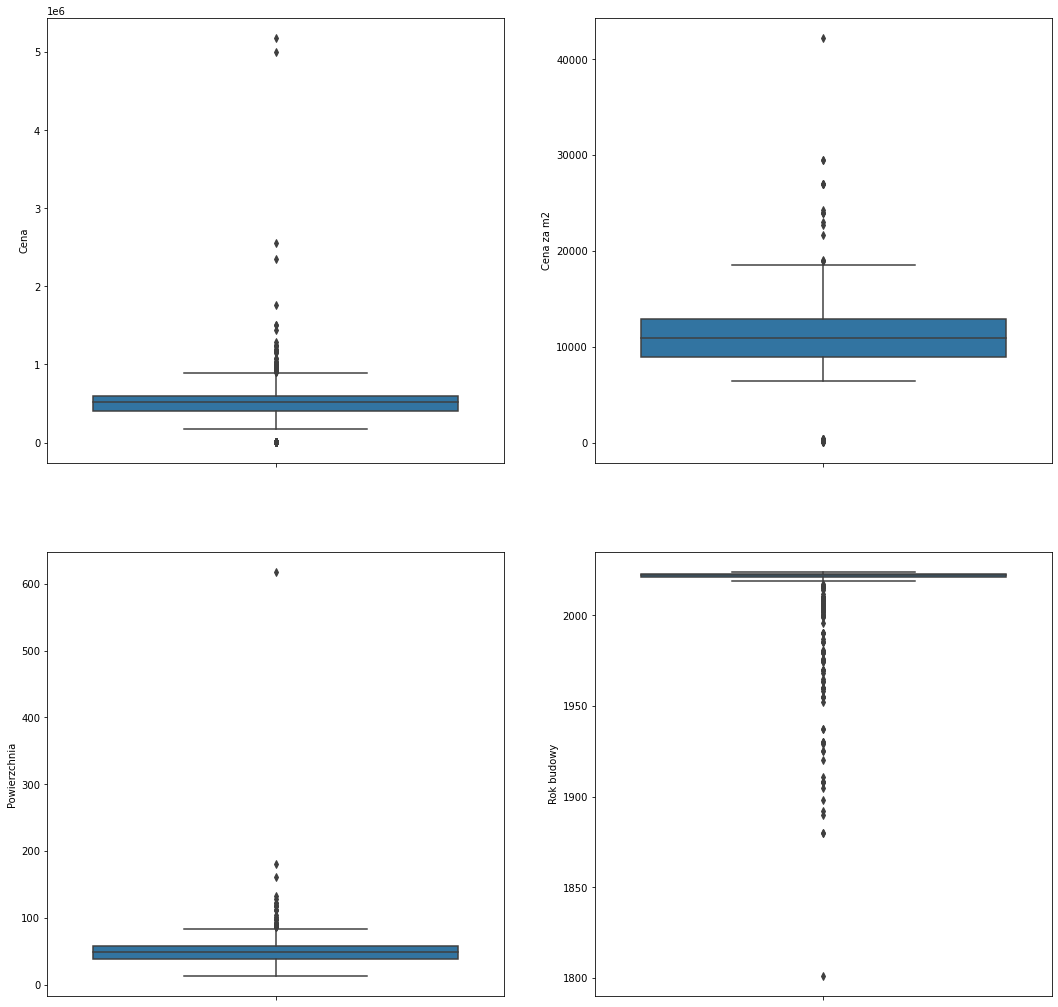

In [17]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
sns.boxplot(y=df_clean["Cena"])
plt.subplot(2,2,2)
sns.boxplot(y=df_clean["Cena za m2"])
plt.subplot(2,2,3)
sns.boxplot(y=df_clean["Powierzchnia"])
plt.subplot(2,2,4)
sns.boxplot(y=df_clean["Rok budowy"])

In [18]:
continuous_cols = ['Cena', 'Cena za m2', 'Powierzchnia', 'Rok budowy']
df_clean[continuous_cols].describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Cena,584.0,514876.75,397207.26,2000.0,401377.50,518281.00,599000.00,5180000.00
Cena za m2,584.0,10371.05,5025.14,37.0,8900.00,10880.00,12900.00,42199.00
Powierzchnia,584.0,51.27,30.63,12.8,38.75,49.11,57.29,618.11
Rok budowy,584.0,2012.97,25.78,1801.0,2021.00,2022.00,2023.00,2024.00


In [19]:
df["Miasto"].value_counts()

Kraków    584
Name: Miasto, dtype: int64

In [20]:
df["Oferta od"].value_counts()

firmy               578
osoby prywatnej       6
Name: Oferta od, dtype: int64

In [21]:
df["Rynek"].value_counts()

pierwotny     459
wtórny        125
Name: Rynek, dtype: int64

In [22]:
df["Liczba pokoi"].value_counts()

2      260
3      196
1       80
4       38
5        6
7        3
11       1
Name: Liczba pokoi, dtype: int64